 # Hierarchical Clustering

In [161]:
#Import Hierarchical Clustering Libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

In [162]:
EWAirlines = pd.read_csv("D:/Assignments Excel R/assignment 7/EastWestAirlines.csv")

In [163]:
EWAirlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


 # EDA Process

In [164]:
EWAirlines.shape

(3999, 12)

In [165]:
EWAirlines.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [166]:
EWAirlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [167]:
ewa=EWAirlines.copy()

In [168]:
ewa

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [169]:
ewa[ewa.duplicated()].shape

(0, 12)

 ## Missing Values and Imputation

In [170]:
ewa.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

<AxesSubplot:>

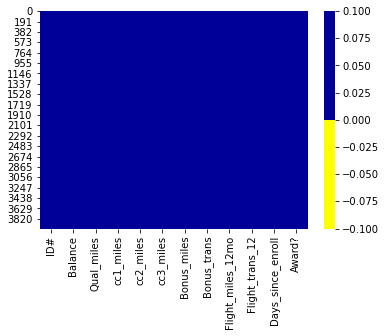

In [171]:
import seaborn as sns
cols=ewa.columns
colours = ['#ffff00', '#000099'] # # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(ewa[cols].isnull(),
            cmap=sns.color_palette(colours))

In [200]:
import pandas_profiling as pp

In [201]:
pip install sweetviz


Note: you may need to restart the kernel to use updated packages.


In [202]:
import sweetviz as sv
sweet_report = sv.analyze(ewa)
sweet_report.show_html('EWA_report.html')


Report EWA_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


 # Hierarchical Clustering

In [210]:
# Normalization Function
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

In [211]:
# Normalized data frame (Considering the numerical part of data)
df_norm = norm_func(ewa.iloc[:,0:])

In [212]:
df_norm

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


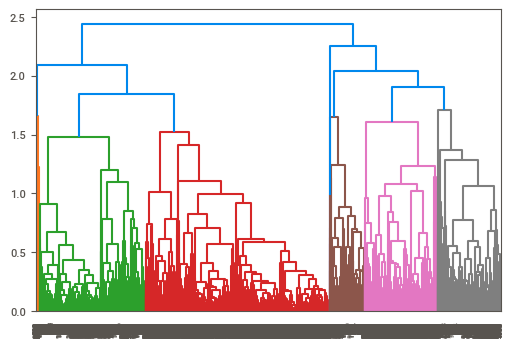

In [213]:
 # Create Dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [216]:
# Create Cluster
hc=AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage='single')

In [218]:
# Save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns =['Clusters'])

In [222]:
df_norm['h_clusterid']= hc.labels_

In [223]:
df_norm

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,1
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,1
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,1
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,1
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,0
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,0
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,1


In [224]:
Clusters

,Clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [225]:
df_norm.groupby('h_clusterid').agg(['mean'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
h_clusterid,,,,,,,,,,,,
0,0.433666,0.056903,0.021530,0.415709,0.00777,0.004561,0.109511,0.182967,0.027169,0.048406,0.557663,1.0
1,0.540341,0.035081,0.007858,0.176330,0.00695,0.002184,0.038788,0.106314,0.007343,0.012311,0.460411,0.0
2,0.896766,0.093917,0.044851,0.000000,0.00000,0.000000,0.272879,1.000000,1.000000,1.000000,0.165300,1.0


In [226]:
EWAirlines['h_clusterid']= hc.labels_

In [227]:
EWAirlines.groupby('h_clusterid').agg(['mean'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
h_clusterid,,,,,,,,,,,,
0,1744.335811,97010.442568,240.020946,2.662838,1.015541,1.018243,28876.327703,15.735135,837.258108,2.565541,4627.259459,1
1,2173.169182,59807.839555,87.602462,1.705322,1.013900,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0
2,3606.000000,160114.000000,500.000000,1.000000,1.000000,1.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000,1


In [228]:
EWAirlines.groupby('h_clusterid').agg(['count'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,count,count,count,count,count,count,count,count,count,count,count,count
h_clusterid,,,,,,,,,,,,
0,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480
1,2518,2518,2518,2518,2518,2518,2518,2518,2518,2518,2518,2518
2,1,1,1,1,1,1,1,1,1,1,1,1


 # K-Mean Clustering

In [230]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [231]:
EWAirlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [232]:
ewa=EWAirlines.copy()

In [233]:
ewa.head ()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [254]:
# Normalization  function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_ewa_df = scaler.fit_transform(ewa.iloc[:,0:])

In [255]:
scaled_ewa_df

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -7.66919299e-01,  7.65276428e-01, -5.50554761e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -7.66919299e-01,  7.65276428e-01, -5.50554761e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -7.66919299e-01,  7.65276428e-01, -5.50554761e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
         1.30391816e+00, -1.30391927e+00,  1.27655602e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -7.66919299e-01,  7.65276428e-01, -5.50554761e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -7.66919299e-01,  7.65276428e-01, -5.50554761e-01]])

<function matplotlib.pyplot.show(close=None, block=None)>

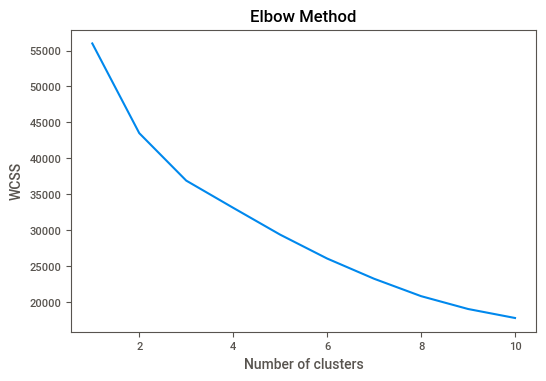

In [256]:
wcss =[]
for i in range (1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_ewa_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show

In [261]:
# Build Cluster Algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(scaled_ewa_df)

KMeans(n_clusters=3, random_state=42)

In [258]:
clusters_new.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [271]:
ewa['clusterid_new'] = clusters_new.labels_

In [272]:
ewa

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,0


In [276]:
# These are standardized values
clusters_new.cluster_centers_

array([[ 1.58963039e-01, -1.88303215e-01, -7.77580078e-02,
        -3.08087094e-01, -9.99760088e-04, -4.38565333e-02,
        -3.41660634e-01, -3.06325392e-01, -2.00749815e-01,
        -2.27199312e-01, -1.67555138e-01, -7.66919299e-01,
         7.65276428e-01, -5.50554761e-01],
       [-2.32715619e-01,  1.26607547e-01,  2.25178846e-02,
         4.91948844e-01, -1.49798853e-02,  6.68706233e-02,
         4.61229679e-01,  3.05982419e-01, -5.70428841e-02,
        -5.90394413e-02,  2.42083050e-01,  1.22605587e+00,
        -1.22611871e+00,  1.27655602e+00],
       [-3.69135880e-01,  1.59542135e+00,  8.90066228e-01,
         3.97477992e-01,  1.30082003e-01,  8.11244731e-02,
         1.09599988e+00,  1.81824506e+00,  3.19279976e+00,
         3.57058129e+00,  4.14036901e-01,  9.78168447e-01,
        -9.55178420e-01, -2.37766554e+00]])

In [250]:
ewa.groupby('clusterid_new').agg(['mean'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusterid_new,,,,,,,,,,,,,
0,1586.393258,234360.870787,832.640449,2.606742,1.033708,1.028090,43610.994382,29.061798,4930.084270,14.915730,4973.494382,0.842697,0.168539
1,2199.315012,54627.318704,83.963495,1.635357,1.014356,1.003692,8894.442986,8.660377,178.999180,0.511895,3772.578753,0.000000,1.000000
2,1744.725235,86358.691974,161.533623,2.736804,1.012292,1.025307,28282.596529,14.540130,380.193782,1.149675,4618.430947,0.962401,0.037599


In [264]:
ewa.groupby('clusterid_new').agg(['count'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
,count,count,count,count,count,count,count,count,count,count,count,count,count
clusterid_new,,,,,,,,,,,,,
0,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438
1,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383
2,178,178,178,178,178,178,178,178,178,178,178,178,178


 # Conclusion

 # Hierarchical Clustering

In [266]:
EWAirlines.groupby('h_clusterid').agg(['mean'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
h_clusterid,,,,,,,,,,,,
0,1744.335811,97010.442568,240.020946,2.662838,1.015541,1.018243,28876.327703,15.735135,837.258108,2.565541,4627.259459,1
1,2173.169182,59807.839555,87.602462,1.705322,1.013900,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0
2,3606.000000,160114.000000,500.000000,1.000000,1.000000,1.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000,1


In [267]:
EWAirlines.groupby('h_clusterid').agg(['count'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,count,count,count,count,count,count,count,count,count,count,count,count
h_clusterid,,,,,,,,,,,,
0,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480
1,2518,2518,2518,2518,2518,2518,2518,2518,2518,2518,2518,2518
2,1,1,1,1,1,1,1,1,1,1,1,1


 # K-Mean Clustering

In [268]:
ewa.groupby('clusterid_new').agg(['mean'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusterid_new,,,,,,,,,,,,,
0,2199.315012,54627.318704,83.963495,1.635357,1.014356,1.003692,8894.442986,8.660377,178.999180,0.511895,3772.578753,0.000000,1.000000
1,1744.725235,86358.691974,161.533623,2.736804,1.012292,1.025307,28282.596529,14.540130,380.193782,1.149675,4618.430947,0.962401,0.037599
2,1586.393258,234360.870787,832.640449,2.606742,1.033708,1.028090,43610.994382,29.061798,4930.084270,14.915730,4973.494382,0.842697,0.168539


In [269]:
ewa.groupby('clusterid_new').agg(['count'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
,count,count,count,count,count,count,count,count,count,count,count,count,count
clusterid_new,,,,,,,,,,,,,
0,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438
1,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383
2,178,178,178,178,178,178,178,178,178,178,178,178,178


 ####  Inferences - We will go with Kmeans Clustering Since in hierarchiacl clustering all data is gathherd in one cluster only.